# Multi-Linear Regression 
Linear regression is a statistical method used for predictive analysis. It models the relationship between a dependent variable and a single independent variable by fitting a linear equation to the data. Multiple Linear Regression extends this concept by modelling the relationship between a dependent variable and two or more independent variables. This technique allows us to understand how multiple features collectively affect the outcomes.

Below is the table containing home prices in monroe twp, NJ. Here price depends on area (square feet), bed rooms and age of the home (in years). Given these prices we have to predict prices of new homes based on area, bed rooms and age. 

![image](./resources/homeprices.jpg)

Given these home prices find out price of a home that has,

3000 sqr ft area, 3 bedrooms, 40 year old

2500 sqr ft area, 4 bedrooms, 5 year old

We will use regression with multiple variables here. Price can be calculated using following equation,

![image](./resources/equation.jpg)

Here area, bedrooms, age are called independant variables or features whereas price is a dependant variable

In [1]:
# Predicting House Prices using Multi-Linear Regression
import pandas as pd
import numpy as np
from sklearn import linear_model

In [5]:
df = pd.read_csv('./resources/house_prices.csv')
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [6]:
# Data Preprocessing: Fill NA values with median value of a column 
df.bedrooms.median() 
df.bedrooms = df.bedrooms.fillna(df.bedrooms.median())
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [7]:
# Create and train the model
reg = linear_model.LinearRegression()
reg.fit(df[['area' ,'bedrooms','age']], df.price)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [9]:
# Print the coefficients and intercept
print('Coefficients: ', reg.coef_)
print('Intercept: ', reg.intercept_)

Coefficients:  [  112.06244194 23388.88007794 -3231.71790863]
Intercept:  221323.00186540437


In [10]:
# Predict the price of a house with area=3000, bedrooms=3, age=40
predicted_price = reg.predict([[3000, 3, 40]])
print('Predicted price of the house: ', predicted_price)

Predicted price of the house:  [498408.25158031]


d:\College\5th sem\Professional Electives\Statistical Methods and ML models\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# MultiCollinearity

Multicollinearity happens when two or more predictor(independent) variables in a model are closely related to each other. 
Because they give similar information, it becomes difficult to know how each one affects the result, this is a common problem in multiple linear regression and can make the model’s results less reliable. It can change the effects of independent variables a lot even with small changes in data. Detecting and fixing multicollinearity is important to make models more accurate and easier to understand. 

## Sysmptoms of Multicollinearity:

- Very high R², but very low p-values or insignificant coefficients.
- Large standard errors of coefficients.
- Coefficients change drastically when you:
    - add or remove features
    - add a few more rows of data

## How to detect Multicollinearity?

- Correlation Matrix: A table showing correlation coefficients between variables. High values (close to 1 or -1) indicate strong relationships.
- Variance Inflation Factor (VIF): A measure that quantifies how much the variance of a regression coefficient is increased due to multicollinearity. A VIF value above 5 or 10 suggests a problem.
- Condition Number: A measure derived from the eigenvalues of the feature matrix. A high condition number (typically above 30) indicates multicollinearity.

## How to handle Multicollinearity?

- Option 1: Remove one of the correlated features
Example:
If “height” and “weight” are highly correlated, remove one.
(Choose based on domain knowledge.)

- Option 2: Combine features

Example:
Instead of “height” and “weight”, use “BMI”.

- Option 3: Use Regularization
    - Ridge Regression (L2)
    - Lasso Regression (L1)
These penalize large coefficients and stabilize the model.

- Option 4: Principal Component Analysis (PCA)

Convert correlated features into uncorrelated components.

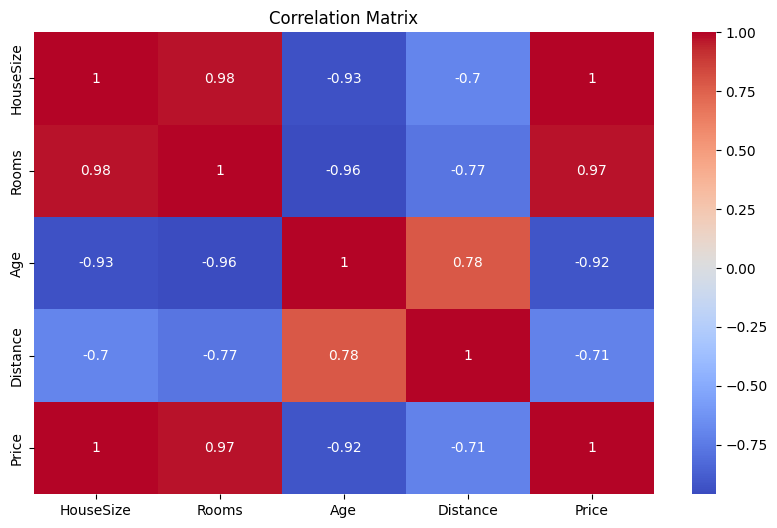


Variance Inflation Factor (VIF):
     Feature         VIF
0      const  645.100220
1  HouseSize  421.083667
2      Rooms   45.123639
3        Age   17.846507
4   Distance    4.653101
5      Price  354.997616


In [14]:
# Python code for detecting multicollinearity using Variance Inflation Factor (VIF)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# -------------------------------
# 1. Load your dataset
# -------------------------------
df = pd.read_csv("./resources/multi-collinearity.csv")   

# -------------------------------
# 2. Select only numeric columns
# -------------------------------
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# -------------------------------
# 3. Correlation Matrix Heatmap
# -------------------------------
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# -------------------------------
# 4. Calculating VIF for each feature
# -------------------------------

# Add constant column for statsmodels
X = sm.add_constant(numeric_df)

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
for i in range(X.shape[1])]

print("\nVariance Inflation Factor (VIF):")
print(vif_data)